In [2]:
import numpy as np
from vectorized_metrics import confmat
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
def binary_clf_curve(y_true, y_score):
    pos_label = 1.0
    y_true = (y_true == pos_label)

    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]

    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    tps = np.cumsum(y_true, dtype=np.float64)[threshold_idxs]
    fps = 1 + threshold_idxs - tps
    thr = y_score[threshold_idxs]

    return fps, tps, thr

In [4]:
ytrue = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])
yscore = np.array([0.523, 0.957, 0.489, 0.244, 0.311, 0.093, 0.21 , 0.065, 0.552, 0.556])

In [5]:
%time a = confmat(*binary_clf_curve(ytrue, yscore)[:-1])

CPU times: user 857 µs, sys: 227 µs, total: 1.08 ms
Wall time: 686 µs


In [6]:
%%time 
for thr in sorted(yscore):
    confusion_matrix(ytrue, yscore>thr)

CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 9.75 ms


In [7]:
n = np.array([0.898, 0.910, 1.13, 1.39])
f = np.array([14, 80 ,800, 52*1000])
l = np.array([10**x for x in range(1, len(n)+1)], dtype=float)

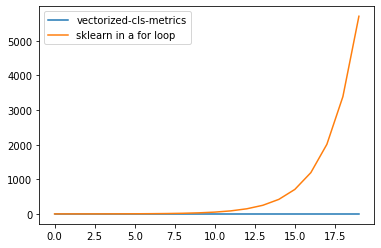

In [9]:
def func(x, a, b):
    return a*np.exp(b*x)

plt.plot(func(np.arange(20), *scipy.optimize.curve_fit(func,  l/1000,  n/1000)[0]), label='vectorized-cls-metrics')
plt.plot(func(np.arange(20), *scipy.optimize.curve_fit(func,  l/1000,  f/1000)[0]), label='sklearn in a for loop')
plt.legend();
plt.savefig('results.png', dpi=300)